## Importing libraries and data files

In [142]:
import pandas as pd
import csv
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [6]:
train_news = pd.read_csv('train.csv')
test_news = pd.read_csv('test.csv')
valid_news = pd.read_csv('valid.csv')

## Overview of the training and testing dataset

In [28]:
print("training dataset size:")
print(train_news.shape)
print(train_news.head(10))

print("Testing dataset size:")
print(test_news.shape)
print(test_news.head(10))
    
print("validation dataset size:")
print(valid_news.shape)   
print(valid_news.head(10))

training dataset size:
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
5  The Chicago Bears have had more starting quart...   True
6  Jim Dunnam has not lived in the district he re...  False
7  I'm the only person on this stage who has work...   True
8  However, it took $19.5 million in Oregon Lotte...   True
9  Says GOP primary opponents Glenn Grothman and ...   True
Testing dataset size:
(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a pla

In [160]:
test_news['Statement'][4]

'When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.'


### Labels count in training set

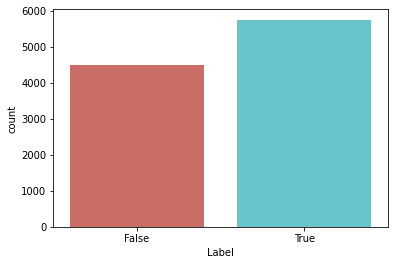

In [8]:
sb.countplot(x='Label', data=train_news, palette='hls')

### Labels count in test set

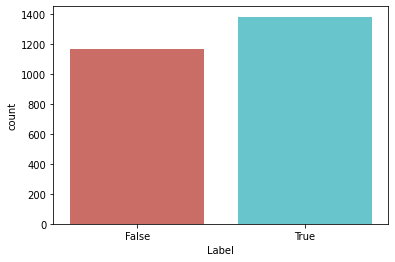

In [9]:
sb.countplot(x='Label', data=test_news, palette='hls')

## Preprocessing the data

In [10]:
print("Checking data qualitites...")
train_news.isnull().sum()
train_news.info()


Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [11]:
print("Checking data qualities in testing set:")
test_news.isnull().sum()
test_news.info()

Checking data qualities in testing set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB


In [12]:
#Stemming to reduce words to its word stems
def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [13]:
#processing the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

In [14]:
#creating unigram in nltk
def create_unigram(words):
    assert type(words) == list
    return words

#creating bigram in nltk
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

### Creating bag of words using Count vectorizer and TF-IDF to convert unstructured data into set of attributes

In [15]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [49]:
#we will start with simple bag of words technique using count vectorizer
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)

In [50]:
print(countV)
print(train_count)


CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1


## Importing models

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

### First we will use bag of words technique

In [53]:
#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV', countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(train_news['Statement'], train_news['Label'])
predicted_nb = nb_pipeline.predict(test_news['Statement'])
np.mean(predicted_nb == test_news['Label'])

0.6072128577028616

In [54]:
#Logistic Regression classifier
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(train_news['Statement'], train_news['Label'])
predicted_LogR = logR_pipeline.predict(test_news['Statement'])
np.mean(predicted_LogR == test_news['Label'])

0.591140729125833

In [59]:
# svm classifier
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_svm = svm_pipeline.predict(test_news['Statement'])
np.mean(predicted_svm == test_news['Label'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5723245785966288

In [60]:
#stochastic gradient descent
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_sgd = sgd_pipeline.predict(test_news['Statement'])
np.mean(predicted_sgd == test_news['Label'])

0.613092904743238

In [62]:
#Random forest classifier
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=100,n_jobs=3))
        ])
    
random_forest.fit(train_news['Statement'],train_news['Label'])
predicted_rf = random_forest.predict(test_news['Statement'])
np.mean(predicted_rf == test_news['Label'])

0.613092904743238

In [63]:
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['Statement'] 
        train_y = train_news.iloc[train_ind]['Label']
    
        test_text = train_news.iloc[test_ind]['Statement']
        test_y = train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(train_news)),
    print('F1-Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [64]:
build_confusion_matrix(nb_pipeline)


Total statements classified: 10240
F1-Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


(None, None, None, None, None)

In [65]:
build_confusion_matrix(logR_pipeline)


Total statements classified: 10240
F1-Score: 0.7025623649614049
score length 5
Confusion matrix:
[[1177 3311]
 [ 844 4908]]


(None, None, None, None, None)

In [66]:
build_confusion_matrix(svm_pipeline)


Total statements classified: 10240
F1-Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(None, None, None, None, None)

In [45]:
build_confusion_matrix(random_forest)


Total statements classified: 10240
Score: 0.659933439952882
score length 5
Confusion matrix:
[[1490 2998]
 [1442 4310]]


(None, None, None, None, None)

### So far we have used bag of words technique to extract the features and passed those featuers into classifiers. We have also seen the f1 scores of these classifiers. Now lets enhance these features using term frequency weights with various n-grams

In [68]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)


### Now using n-gram 

In [69]:
##Using Naive-Bayes
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_nb_ngram == test_news['Label'])

0.5938847510780086

In [70]:
#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_LogR_ngram == test_news['Label'])

0.6193649549196394

In [71]:
#linear SVM classifier
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_svm_ngram == test_news['Label'])

0.6170129361034888

In [73]:
#sgd classifier
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
         ])

sgd_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_sgd_ngram == test_news['Label'])


0.5417483339866719

In [75]:
#Random Forest Classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['Statement'])
np.mean(predicted_rf_ngram == test_news['Label'])

0.6025088200705606

In [78]:
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

Total statements classified: 10240
F1-Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
F1-Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
Total statements classified: 10240
F1-Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]
Total statements classified: 10240
F1-Score: 0.7190643331130575
score length 5
Confusion matrix:
[[   5 4483]
 [   6 5746]]
Total statements classified: 10240
F1-Score: 0.6583368788755276
score length 5
Confusion matrix:
[[1993 2495]
 [1705 4047]]


(None, None, None, None, None)

In [80]:
print("Naive-Bayes Classification Report")
print(classification_report(test_news['Label'], predicted_nb_ngram))


Naive-Bayes Classification Report
              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551



In [82]:
print("Logistic Regression Classification Report")
print(classification_report(test_news['Label'], predicted_LogR_ngram))


Logistic Regression Classification Report
              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



In [84]:
print("SVM Classification Report")
print(classification_report(test_news['Label'], predicted_svm_ngram))


SVM Classification Report
              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551



In [86]:
print("Random Forest Classification Report")
print(classification_report(test_news['Label'], predicted_rf_ngram))

Random Forest Classification Report
              precision    recall  f1-score   support

       False       0.58      0.46      0.52      1169
        True       0.61      0.72      0.66      1382

    accuracy                           0.60      2551
   macro avg       0.60      0.59      0.59      2551
weighted avg       0.60      0.60      0.60      2551



###  We can see that random forest and logistic regression are best performing in terms of precision and recall (take a look into false positive and true negative counts which appeares to be low compared to rest of the models)

### Using Grid Search CV to optimise best fit parameters for Logistic regression and Random forest

### Grid Search CV on random forest

In [89]:
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'rf_tfidf__use_idf': (True, False),
               'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([2.05791745, 1.94410877, 2.47894258, 2.41898675, 3.2570385 ,
        3.03598804, 3.6386713 , 3.57822642, 4.12078052, 4.09138455,
        1.90244536, 1.98958316, 2.66954861, 2.55533762, 3.13792133,
        3.08940535, 3.86097908, 3.79714036, 4.47562609, 4.71137695,
        2.19359903, 2.13679881, 2.63193178, 2.53701353, 3.43978577,
        3.24730372, 3.96850977, 3.82996416, 4.4389679 , 4.42904477,
        2.2643662 , 2.07664795, 2.77371664, 2.81122794, 3.46569057,
        3.36376495, 4.12080417, 4.11133976, 4.88107572, 5.1925787 ,
        2.18099952, 2.13722062, 3.06852369, 2.91428499, 3.59014993,
        3.75721073, 4.18661566, 4.14944611, 4.84700422, 4.99697213,
        2.3089788 , 2.12737741, 3.07097144, 3.01708899, 3.84008365,
        3.75498099, 4.62137299, 4.80059695, 5.21201115, 5.34382601,
        2.40601473, 2.32536445, 3.21112356, 3.29042358, 4.46569257,
        4.25964193, 5.94388795, 5.13165693, 5.95458031, 5.72306232,
        2.543436  , 2.61354084,

In [91]:
#Running random forest with best fit parameters
random_forest_final = Pipeline([
        ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))
        ])
    
random_forest_final.fit(train_news['Statement'],train_news['Label'])
predicted_rf_final = random_forest_final.predict(test_news['Statement'])
np.mean(predicted_rf_final == test_news['Label'])
print(classification_report(test_news['Label'], predicted_rf_final))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.27      0.50      0.35      2551
weighted avg       0.29      0.54      0.38      2551



### Grid Search CV on Logistic regression

In [93]:
#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([0.76091952, 0.60784583, 0.68526177, 0.59933453, 2.70275064,
        2.99390879, 2.68246036, 2.88668075, 4.04407511, 4.76716256,
        3.392627  , 4.43623347, 4.44313183, 5.4668292 , 4.46057744,
        5.46071744, 5.39540162, 6.6831512 , 5.75138631, 6.07942777]),
 'std_fit_time': array([0.0468712 , 0.02037098, 0.01789055, 0.02513488, 0.0809045 ,
        0.07600858, 0.21086912, 0.15415291, 0.67291193, 0.13158532,
        0.18778975, 0.10799173, 0.12823854, 0.36351509, 0.24208702,
        0.25126863, 0.51389872, 0.36663017, 0.19156945, 0.62948591]),
 'mean_score_time': array([0.09294715, 0.08580074, 0.08765912, 0.0861228 , 0.19040136,
        0.16311221, 0.18887038, 0.16006775, 0.20040655, 0.18680367,
        0.22354903, 0.17905269, 0.2215548 , 0.22373414, 0.24284439,
        0.22110138, 0.26464324, 0.26055217, 0.26652555, 0.19655066]),
 'std_score_time': array([0.00603275, 0.00309436, 0.00455389, 0.00401503, 0.04175516,
        0.02713858, 0.02040714, 0.025112

In [95]:
#Running logistic regression with best fit parameters
logR_pipeline_final = Pipeline([
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_final.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(test_news['Statement'])
np.mean(predicted_LogR_final == test_news['Label'])
#accuracy = 0.62
print(classification_report(test_news['Label'], predicted_LogR_final))

              precision    recall  f1-score   support

       False       0.64      0.38      0.48      1169
        True       0.61      0.82      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



### Saving the best model i.e Logistic regression in final_model.sav

In [144]:
import pickle
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))

In [164]:
def plot_learning_curve(pipeline,title):
    size = 100
    cv = KFold(size, shuffle=True)
    
    X = train_news["Statement"]
    y = train_news["Label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


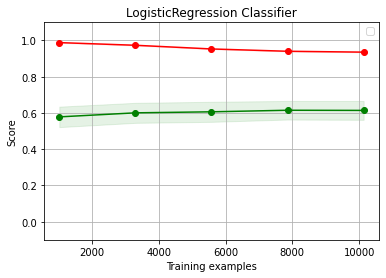

In [165]:
plot_learning_curve(logR_pipeline_ngram, "LogisticRegression Classifier")

In [161]:

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))


Please enter the news text you want to verify: When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes
You entered: When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes


In [162]:

#function to run for prediction
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))

In [163]:
detecting_fake_news(var)

The given statement is  False
The truth probability score is  0.2790938656560584


(None, None)